$$v(t, x) = 1 + u(t)w(x)$$

$$v(t) = 1 + u(t)w(x(t))$$

We will consider inhibitory weights ($w < 0$).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

from disp import set_plot

cc = np.concatenate

RT = np.linspace(-.1, .6, 1001)
RX = np.linspace(-.1, .6, 1001)

def plot_trj(ax, u_fn, w_fn, t=None, xs=None, cscale=1):
    v_mat = 1 + u_fn(RT)[:, None]@w_fn(RX)[None, :]
    ax.matshow(
        cscale*(v_mat.T-1), origin='lower', extent=[RT[0], RT[-1], RX[0], RX[-1]],
        vmin=-1, vmax=1, cmap='PiYG', zorder=0)  # pink = slow, g = fast, 1 = white
    
    if t is not None:
        [ax.plot(t, x, c='k') for x in xs]
    
    ax.xaxis.tick_bottom()
    set_plot(ax, x_label='t', y_label='x')

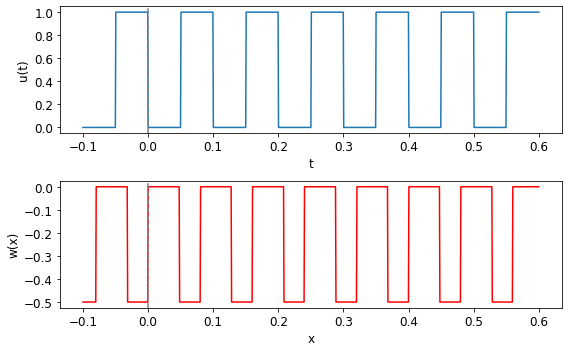

In [12]:
DT = .001
PER_T = .1
DUTY_T = .5
PER_X = .08
DUTY_X = .4
W_SCALE = 0.5
T_0 = PER_T - PER_T*DUTY_T
X_0 = 0 + PER_X - PER_X*DUTY_X

def u_fn(t_):
    sq_wv = signal.square((2*np.pi*(t_- T_0)/PER_T), duty=DUTY_T)
    return (sq_wv + 1)/2

def w_fn(x_):
    sq_wv = signal.square((2*np.pi*(x_-X_0)/PER_X), duty=DUTY_X)
    return -W_SCALE*(sq_wv + 1)/2

def v_fn(t_, x_):
    return 1 + u_fn(t_)*w_fn(x_)

fig, axs = plt.subplots(2, 1, figsize=(8, 5), tight_layout=True)
axs[0].plot(RT, u_fn(RT))
set_plot(axs[0], x_label='t', y_label='u(t)')
axs[1].plot(RX, w_fn(RX), c='r')
set_plot(axs[1], x_label='x', y_label='w(x)')
for ax in axs:
    ax.axvline(0, color='gray', ls='--')

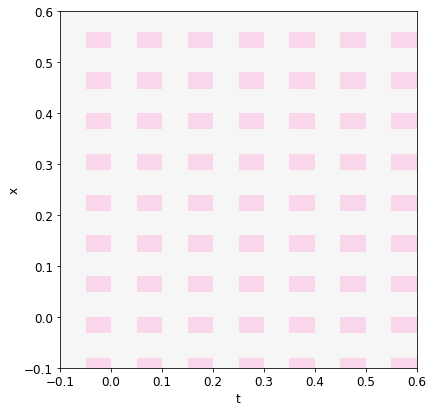

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)
plot_trj(ax, u_fn, w_fn, cscale=.25/W_SCALE)

In [18]:
t = np.arange(0, .6, DT)

x_0s = np.arange(-.1, .12, .02)  #[-.04, -.02, 0, .02, .04]
xs = []
vs = []

for x_0 in x_0s:
    x = np.nan*np.zeros(len(t))
    v = np.nan*np.zeros(len(t))
    x[0] = x_0
    v[0] = v_fn(0, x[0])

    for ct, t_ in enumerate(t[1:], 1):
        v[ct] = v_fn(t_, x[ct-1])
        x[ct] = x[ct-1] + DT*v[ct]
        
    xs.append(x.copy())
    vs.append(v.copy())

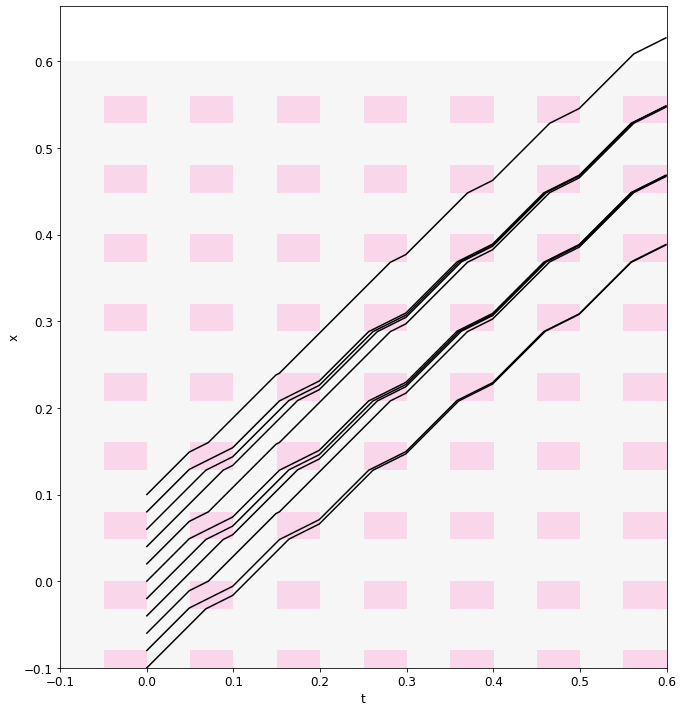

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)
plot_trj(ax, u_fn, w_fn, t, xs, cscale=.25/W_SCALE)